In [1]:
import pandas as pd
from pathlib import Path
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import linregress
from sklearn import datasets

In [2]:
# Define path of files
combined_path = "../Data/combined_df.csv"

# Read CSV
combined_df = pd.read_csv(combined_path)

In [3]:
combined_df.head()

,year_x,week_x,home_team_x,away_team_x,winner,tie,day,date,time,pts_win,...,gametime_local,home_team_y,away_team_y,home_score,away_score,OT_flag,arrests,division_game,DateTime,hour
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,7:30:00 PM,Green Bay,New Orleans,42,34,NaN,8.0,n,2011-09-08 19:30:00,19
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,1:05:00 PM,Baltimore,Pittsburgh,35,7,NaN,1.0,y,2011-09-11 13:05:00,13
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,12:00:00 PM,Houston,Indianapolis,34,7,NaN,2.0,y,2011-09-11 12:00:00,12
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,1:00:00 PM,Jacksonville,Tennessee,16,14,NaN,4.0,y,2011-09-11 13:00:00,13
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,12:00:00 PM,Chicago,Atlanta,30,12,NaN,1.0,n,2011-09-11 12:00:00,12


In [4]:
# combined dataset metadata
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_x             965 non-null    int64  
 1   week_x             965 non-null    int64  
 2   home_team_x        965 non-null    object 
 3   away_team_x        965 non-null    object 
 4   winner             965 non-null    object 
 5   tie                3 non-null      object 
 6   day                965 non-null    object 
 7   date               965 non-null    object 
 8   time               965 non-null    object 
 9   pts_win            965 non-null    int64  
 10  pts_loss           965 non-null    int64  
 11  yds_win            965 non-null    int64  
 12  turnovers_win      965 non-null    int64  
 13  yds_loss           965 non-null    int64  
 14  turnovers_loss     965 non-null    int64  
 15  home_team_name     965 non-null    object 
 16  home_team_city_x   965 non

In [5]:
# Columns 
combined_df.columns

Index(['year_x', 'week_x', 'home_team_x', 'away_team_x', 'winner', 'tie',
       'day', 'date', 'time', 'pts_win', 'pts_loss', 'yds_win',
       'turnovers_win', 'yds_loss', 'turnovers_loss', 'home_team_name',
       'home_team_city_x', 'away_team_name', 'away_team_city', 'Concat_Column',
       'home_team_city_y', 'team_name', 'year_y', 'total', 'home', 'away',
       'week_y', 'weekly_attendance', 'season', 'week_num', 'day_of_week',
       'gametime_local', 'home_team_y', 'away_team_y', 'home_score',
       'away_score', 'OT_flag', 'arrests', 'division_game', 'DateTime',
       'hour'],
      dtype='object')

In [6]:
# Subset of data with columns that I want
combined_df = combined_df.loc[:,['year_x', 'week_x', 'home_team_x', 'away_team_x', 'winner', 'tie',
       'day', 'date', 'time', 'home_score', 'away_score', 'yds_win',
       'turnovers_win', 'yds_loss', 'turnovers_loss', 'weekly_attendance','day_of_week',
       'gametime_local', 'OT_flag', 'arrests', 'division_game', 'DateTime',
       'hour']]
combined_df.head()

,year_x,week_x,home_team_x,away_team_x,winner,tie,day,date,time,home_score,...,yds_loss,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,477,1,70555.0,Thursday,7:30:00 PM,NaN,8.0,n,2011-09-08 19:30:00,19
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,312,7,71434.0,Sunday,1:05:00 PM,NaN,1.0,y,2011-09-11 13:05:00,13
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,236,2,71444.0,Sunday,12:00:00 PM,NaN,2.0,y,2011-09-11 12:00:00,12
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,292,1,61619.0,Sunday,1:00:00 PM,NaN,4.0,y,2011-09-11 13:00:00,13
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,386,3,62115.0,Sunday,12:00:00 PM,NaN,1.0,n,2011-09-11 12:00:00,12


In [7]:
# Call columns I kept
combined_df.columns

Index(['year_x', 'week_x', 'home_team_x', 'away_team_x', 'winner', 'tie',
       'day', 'date', 'time', 'home_score', 'away_score', 'yds_win',
       'turnovers_win', 'yds_loss', 'turnovers_loss', 'weekly_attendance',
       'day_of_week', 'gametime_local', 'OT_flag', 'arrests', 'division_game',
       'DateTime', 'hour'],
      dtype='object')

In [8]:
# Clean up column names
combined_df = combined_df.rename(columns={"year_x":"year", "week_x": "week", "home_team_x": "home_team", "away_team_x": "away_team",})
combined_df.head()

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,yds_loss,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,477,1,70555.0,Thursday,7:30:00 PM,NaN,8.0,n,2011-09-08 19:30:00,19
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,312,7,71434.0,Sunday,1:05:00 PM,NaN,1.0,y,2011-09-11 13:05:00,13
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,236,2,71444.0,Sunday,12:00:00 PM,NaN,2.0,y,2011-09-11 12:00:00,12
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,292,1,61619.0,Sunday,1:00:00 PM,NaN,4.0,y,2011-09-11 13:00:00,13
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,386,3,62115.0,Sunday,12:00:00 PM,NaN,1.0,n,2011-09-11 12:00:00,12


In [9]:
# Create Score Gap column
combined_df["score_gap"] = abs(combined_df["home_score"] - combined_df["away_score"])
combined_df

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,1,70555.0,Thursday,7:30:00 PM,NaN,8.0,n,2011-09-08 19:30:00,19,8
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,7,71434.0,Sunday,1:05:00 PM,NaN,1.0,y,2011-09-11 13:05:00,13,28
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,2,71444.0,Sunday,12:00:00 PM,NaN,2.0,y,2011-09-11 12:00:00,12,27
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,1,61619.0,Sunday,1:00:00 PM,NaN,4.0,y,2011-09-11 13:00:00,13,2
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,3,62115.0,Sunday,12:00:00 PM,NaN,1.0,n,2011-09-11 12:00:00,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2015,17,San Francisco 49ers,St. Louis Rams,San Francisco 49ers,NaN,Sun,January 3,4:25PM,19,...,0,70799.0,Sunday,1:25:00 PM,OT,18.0,y,2015-01-03 13:25:00,13,3
961,2015,17,Carolina Panthers,Tampa Bay Buccaneers,Carolina Panthers,NaN,Sun,January 3,4:25PM,38,...,3,74169.0,Sunday,4:25:00 PM,NaN,3.0,y,2015-01-03 16:25:00,16,28
962,2015,17,Arizona Cardinals,Seattle Seahawks,Seattle Seahawks,NaN,Sun,January 3,4:25PM,6,...,3,64646.0,Sunday,2:25:00 PM,NaN,2.0,y,2015-01-03 14:25:00,14,30
963,2015,17,Kansas City Chiefs,Oakland Raiders,Kansas City Chiefs,NaN,Sun,January 3,4:26PM,23,...,1,76114.0,Sunday,3:25:00 PM,NaN,2.0,y,2015-01-03 15:25:00,15,6


In [10]:
# Create who won column (home or away)
combined_df['home_away_winner'] = np.where(combined_df['home_score'] > combined_df['away_score'], 'Home', 'Away')

combined_df.head(40)

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,70555.0,Thursday,7:30:00 PM,NaN,8.0,n,2011-09-08 19:30:00,19,8,Home
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,71434.0,Sunday,1:05:00 PM,NaN,1.0,y,2011-09-11 13:05:00,13,28,Home
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,71444.0,Sunday,12:00:00 PM,NaN,2.0,y,2011-09-11 12:00:00,12,27,Home
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,61619.0,Sunday,1:00:00 PM,NaN,4.0,y,2011-09-11 13:00:00,13,2,Home
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,62115.0,Sunday,12:00:00 PM,NaN,1.0,n,2011-09-11 12:00:00,12,18,Home
5,2011,1,Kansas City Chiefs,Buffalo Bills,Buffalo Bills,NaN,Sun,September 11,1:06PM,7,...,68755.0,Sunday,12:00:00 PM,NaN,0.0,n,2011-09-11 12:00:00,12,34,Away
6,2011,1,Tampa Bay Buccaneers,Detroit Lions,Detroit Lions,NaN,Sun,September 11,1:06PM,20,...,51274.0,Sunday,1:00:00 PM,NaN,0.0,n,2011-09-11 13:00:00,13,7,Away
7,2011,1,Arizona Cardinals,Carolina Panthers,Arizona Cardinals,NaN,Sun,September 11,4:15PM,28,...,60627.0,Sunday,1:15:00 PM,NaN,5.0,n,2011-09-11 13:15:00,13,7,Home
8,2011,1,San Diego Chargers,Minnesota Vikings,San Diego Chargers,NaN,Sun,September 11,4:20PM,24,...,66716.0,Sunday,1:15:00 PM,NaN,15.0,n,2011-09-11 13:15:00,13,7,Home
9,2011,1,San Francisco 49ers,Seattle Seahawks,San Francisco 49ers,NaN,Sun,September 11,4:22PM,33,...,69732.0,Sunday,1:15:00 PM,NaN,3.0,y,2011-09-11 13:15:00,13,16,Home


In [11]:
# Create % of attendance arrested column
combined_df["%_arrested"] = combined_df["arrests"] / combined_df["weekly_attendance"]*100

combined_df.head()

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,Thursday,7:30:00 PM,NaN,8.0,n,2011-09-08 19:30:00,19,8,Home,0.011339
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,Sunday,1:05:00 PM,NaN,1.0,y,2011-09-11 13:05:00,13,28,Home,0.001400
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,Sunday,12:00:00 PM,NaN,2.0,y,2011-09-11 12:00:00,12,27,Home,0.002799
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,Sunday,1:00:00 PM,NaN,4.0,y,2011-09-11 13:00:00,13,2,Home,0.006492
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,Sunday,12:00:00 PM,NaN,1.0,n,2011-09-11 12:00:00,12,18,Home,0.001610


In [12]:
# The only wednesday game
# Barack was speaking on Thursday at the Democratic National Convention
wed_game = combined_df.loc[combined_df["day_of_week"]== "Wednesday"]
wed_game

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
191,2012,1,New York Giants,Dallas Cowboys,Dallas Cowboys,NaN,Wed,September 5,8:41PM,17,...,Wednesday,8:20:00 PM,NaN,39.0,y,2012-09-05 20:20:00,20,7,Away,0.047395


In [13]:
# create sub data frame without Wednesday games
day_of_week_df = combined_df.loc[combined_df["day_of_week"]!= "Wednesday"]


In [14]:
day_of_week_df.arrests.describe()

count    964.000000
mean       6.528008
std        9.463283
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       69.000000
Name: arrests, dtype: float64

In [15]:
# The game with the most arrests 
most_arrests = combined_df.loc[combined_df["arrests"]== 69.0]
most_arrests

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
98,2011,10,San Diego Chargers,Oakland Raiders,Oakland Raiders,NaN,Thu,November 10,8:29PM,17,...,Thursday,5:20:00 PM,NaN,69.0,y,2011-11-10 17:20:00,17,7,Away,0.101308


In [16]:
# Amount of games in dataset for each day of the week
day_of_week_df["day_of_week"].value_counts()

day_of_week
Sunday      825
Monday       67
Thursday     58
Saturday     14
Name: count, dtype: int64

In [17]:
# total arrests on each day of the week
day_of_week_df.groupby(by='day_of_week')['arrests'].sum()

day_of_week
Monday       527.0
Saturday      90.0
Sunday      5206.0
Thursday     470.0
Name: arrests, dtype: float64

In [18]:
# Average arrests on each game day
day_of_week_df.groupby(by='day_of_week')['arrests'].mean()


day_of_week
Monday      7.865672
Saturday    6.428571
Sunday      6.310303
Thursday    8.103448
Name: arrests, dtype: float64

<Axes: title={'center': 'NFL Stadium Arrests Per Day of The Week'}, xlabel='Day of the Week', ylabel='Average of Arrests'>

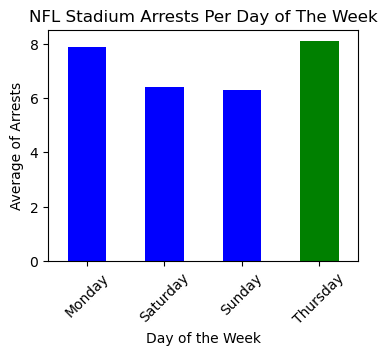

In [19]:
# plot avg arrests per game day of the week
# https://stackoverflow.com/questions/40313727/bar-graph-from-dataframe-groupby
my_colors = list(islice(cycle(['b', 'b', 'b', 'g']), None, len(combined_df.groupby('day_of_week')['arrests'].mean())))
day_of_week_df.groupby('day_of_week')['arrests'].mean().plot(kind='bar', title='NFL Stadium Arrests Per Day of The Week', 
                                                          ylabel='Average of Arrests',xlabel='Day of the Week', color = my_colors, figsize=(4, 3), rot = 45)

Text(0, 0.5, '# of Arrests')

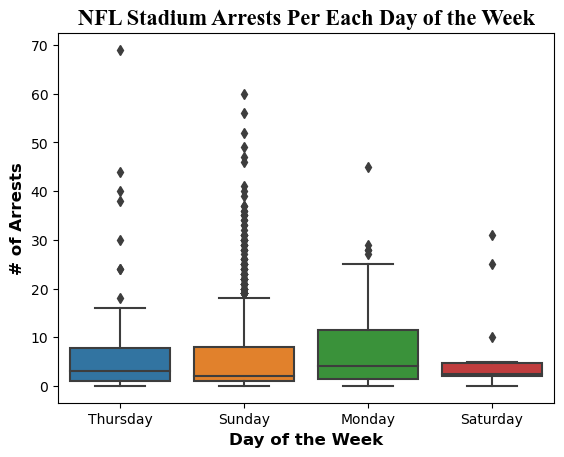

In [20]:
# plot box plot of NFL Stadium Arrest Per Each Day of the Week
dow_box_plot = sns.boxplot(data=day_of_week_df, x="day_of_week", y ="arrests")
dow_box_plot.set_title("NFL Stadium Arrests Per Each Day of the Week", fontname="Times New Roman", size = 16,fontweight="bold")
dow_box_plot.set_xlabel("Day of the Week", size = 12, fontweight="bold")
dow_box_plot.set_ylabel("# of Arrests", size = 12, fontweight="bold")

Text(0, 0.5, '# of Arrests')

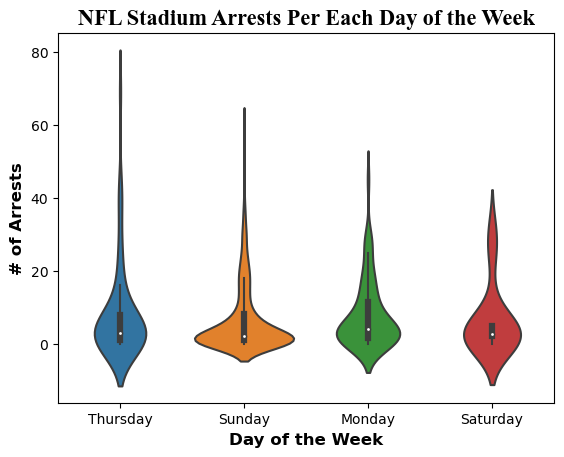

In [21]:
# plot violin plot of NFL Stadium Arrest Per Each Day of the Week
dow_violin_plot=sns.violinplot(data=day_of_week_df, x="day_of_week", y ="arrests")
dow_violin_plot.set_title("NFL Stadium Arrests Per Each Day of the Week", fontname="Times New Roman", size = 16,fontweight="bold")
dow_violin_plot.set_xlabel("Day of the Week", size = 12, fontweight="bold")
dow_violin_plot.set_ylabel("# of Arrests", size = 12, fontweight="bold")


In [22]:
# store Thur games and arrests in a dataframe and print the mean and variance
thurs = day_of_week_df.loc[day_of_week_df.day_of_week == "Thursday", "arrests"]
print(thurs.mean())
print(thurs.var())

8.10344827586207
171.21718088324258


In [23]:
# store Sun games and arrests in a dataframe and print the mean and variance
sun = day_of_week_df.loc[day_of_week_df.day_of_week == "Sunday", "arrests"]
print(sun.mean())
print(sun.var())

6.3103030303030305
84.26524566048894


In [24]:
# store Sat games and arrests in a dataframe and print the mean and variance
sat = day_of_week_df.loc[day_of_week_df.day_of_week == "Saturday", "arrests"]
print(sat.mean())
print(sat.var())

6.428571428571429
91.03296703296702


In [25]:
# store Mon games and arrests in a dataframe and print the mean and variance
mon = day_of_week_df.loc[day_of_week_df.day_of_week == "Monday", "arrests"]
print(mon.mean())
print(mon.var())

7.865671641791045
84.23925825418361


In [26]:
# ANOVA test for day of week and arrests 
stats.f_oneway(thurs, sun, sat, mon)

F_onewayResult(statistic=1.1285731867432665, pvalue=0.336456484377337)

In [27]:
# T test of thurs and sun 
stats.ttest_ind(thurs, sun, equal_var=False)

TtestResult(statistic=1.0260524763760943, pvalue=0.30891803841339854, df=61.00757740504052)

In [28]:
# T test of thurs and sat 
stats.ttest_ind(thurs, sat, equal_var=True)

TtestResult(statistic=0.4498619674225141, pvalue=0.6542000042316242, df=70.0)

In [29]:
# T test of mon and sat 
stats.ttest_ind(mon, sat, equal_var=True)

TtestResult(statistic=0.5293292060593924, pvalue=0.598061417906375, df=79.0)

In [30]:
# number of games in dataset for each day of the week
day_of_week_df.day_of_week.value_counts()

day_of_week
Sunday      825
Monday       67
Thursday     58
Saturday     14
Name: count, dtype: int64

In [31]:
# stats of weekly_attenadance in data
day_of_week_df.weekly_attendance.describe()

count      964.000000
mean     69028.189834
std       8377.223907
min      41142.000000
25%      63392.250000
50%      69143.000000
75%      74099.250000
max      95952.000000
Name: weekly_attendance, dtype: float64

In [32]:
# find most attended game
most_attended = combined_df.loc[combined_df["weekly_attendance"]==  95952.0]
most_attended

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
154,2011,14,Dallas Cowboys,New York Giants,New York Giants,NaN,Sun,December 11,8:30PM,34,...,Sunday,7:20:00 PM,NaN,0.0,y,2011-12-11 19:20:00,19,3,Away,0.0


In [33]:
# find least attended game
least_attended = combined_df.loc[combined_df["weekly_attendance"]==  41142.0]
least_attended

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,...,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
39,2011,4,Cincinnati Bengals,Buffalo Bills,Cincinnati Bengals,NaN,Sun,October 2,1:03PM,23,...,Sunday,1:03:00 PM,NaN,0.0,n,2011-10-02 13:03:00,13,3,Home,0.0


In [34]:
# top 10 attended games 
most_attended_games = combined_df.sort_values(by="weekly_attendance", ascending = False)
pd.set_option('display.max_columns', None)
most_attended_games.head(10)

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,away_score,yds_win,turnovers_win,yds_loss,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
154,2011,14,Dallas Cowboys,New York Giants,New York Giants,NaN,Sun,December 11,8:30PM,34,37,510,1,444,1,95952.0,Sunday,7:20:00 PM,NaN,0.0,y,2011-12-11 19:20:00,19,3,Away,0.000000
353,2012,15,Dallas Cowboys,Pittsburgh Steelers,Dallas Cowboys,NaN,Sun,December 16,4:25PM,27,24,415,1,388,2,95595.0,Sunday,3:25:00 PM,OT,13.0,n,2012-12-16 15:25:00,15,3,Home,0.013599
276,2012,8,Dallas Cowboys,New York Giants,New York Giants,NaN,Sun,October 28,4:25PM,24,29,293,2,434,6,94067.0,Sunday,3:25:00 PM,NaN,15.0,y,2012-10-28 15:25:00,15,5,Away,0.015946
786,2015,1,Dallas Cowboys,New York Giants,Dallas Cowboys,NaN,Sun,September 13,8:31PM,27,26,436,3,288,0,93579.0,Sunday,7:30:00 PM,NaN,13.0,y,2015-09-13 19:30:00,19,1,Home,0.013892
830,2015,5,Dallas Cowboys,New England Patriots,New England Patriots,NaN,Sun,October 11,4:25PM,6,30,356,0,265,2,93054.0,Sunday,3:25:00 PM,NaN,7.0,n,2015-10-11 15:25:00,15,24,Away,0.007523
436,2013,5,Dallas Cowboys,Denver Broncos,Denver Broncos,NaN,Sun,October 6,4:25PM,48,51,517,2,522,2,92758.0,Sunday,3:25:00 PM,NaN,0.0,n,2013-10-06 15:25:00,15,3,Away,0.000000
359,2012,16,Dallas Cowboys,New Orleans Saints,New Orleans Saints,NaN,Sun,December 23,1:02PM,31,34,562,0,446,1,92570.0,Sunday,12:00:00 PM,OT,0.0,n,2012-12-23 12:00:00,12,3,Away,0.000000
759,2014,16,Dallas Cowboys,Indianapolis Colts,Dallas Cowboys,NaN,Sun,December 21,4:26PM,42,7,377,1,229,3,91899.0,Sunday,3:25:00 PM,NaN,1.0,n,2014-12-21 15:25:00,15,35,Home,0.001088
869,2015,9,Dallas Cowboys,Philadelphia Eagles,Philadelphia Eagles,NaN,Sun,November 8,8:31PM,27,33,459,0,411,1,91827.0,Sunday,7:30:00 PM,OT,8.0,y,2015-11-08 19:30:00,19,6,Away,0.008712
858,2015,8,Dallas Cowboys,Seattle Seahawks,Seattle Seahawks,NaN,Sun,November 1,4:25PM,12,13,323,1,220,0,91486.0,Sunday,3:25:00 PM,NaN,8.0,n,2015-11-01 15:25:00,15,1,Away,0.008745


In [35]:
# bottom 10 attended games
least_attended_games = combined_df.sort_values(by="weekly_attendance", ascending = True)
least_attended_games.head(10)

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,away_score,yds_win,turnovers_win,yds_loss,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested
39,2011,4,Cincinnati Bengals,Buffalo Bills,Cincinnati Bengals,NaN,Sun,October 2,1:03PM,23,20,458,2,273,0,41142.0,Sunday,1:03:00 PM,NaN,0.0,n,2011-10-02 13:03:00,13,3,Home,0.000000
144,2011,14,Cincinnati Bengals,Houston Texans,Houston Texans,NaN,Sun,December 11,1:02PM,19,20,412,4,285,2,41202.0,Sunday,1:02:00 PM,NaN,0.0,n,2011-12-11 13:02:00,13,1,Away,0.000000
172,2011,16,Cincinnati Bengals,Arizona Cardinals,Cincinnati Bengals,NaN,Sat,December 24,1:02PM,23,16,301,2,316,3,41273.0,Sunday,1:02:00 PM,NaN,0.0,n,2011-12-24 13:02:00,13,7,Home,0.000000
23,2011,3,Cincinnati Bengals,San Francisco 49ers,San Francisco 49ers,NaN,Sun,September 25,1:02PM,8,13,226,1,228,3,43363.0,Sunday,1:02:00 PM,NaN,3.0,n,2011-09-25 13:02:00,13,5,Away,0.006918
330,2012,13,Oakland Raiders,Cleveland Browns,Cleveland Browns,NaN,Sun,December 2,4:25PM,17,20,475,2,429,1,43641.0,Sunday,1:25:00 PM,NaN,7.0,n,2012-12-02 13:25:00,13,3,Away,0.016040
422,2013,4,Tampa Bay Buccaneers,Arizona Cardinals,Arizona Cardinals,NaN,Sun,September 29,1:03PM,10,13,296,3,253,3,44956.0,Sunday,1:00:00 PM,NaN,0.0,n,2013-09-29 13:00:00,13,3,Away,0.000000
553,2013,15,Pittsburgh Steelers,Cincinnati Bengals,Pittsburgh Steelers,NaN,Sun,December 15,8:30PM,30,20,290,1,279,1,45873.0,Sunday,8:30:00 PM,NaN,10.0,y,2013-12-15 20:30:00,20,10,Home,0.021799
511,2013,12,Oakland Raiders,Tennessee Titans,Tennessee Titans,NaN,Sun,November 24,4:05PM,19,23,426,0,353,2,46001.0,Sunday,1:05:00 PM,NaN,20.0,n,2013-11-24 13:05:00,13,4,Away,0.043477
250,2012,6,Tampa Bay Buccaneers,Kansas City Chiefs,Tampa Bay Buccaneers,NaN,Sun,October 14,1:00PM,38,10,463,2,260,2,46500.0,Sunday,1:00:00 PM,NaN,0.0,n,2012-10-14 13:00:00,13,28,Home,0.000000
31,2011,3,Tampa Bay Buccaneers,Atlanta Falcons,Tampa Bay Buccaneers,NaN,Sun,September 25,4:16PM,16,13,295,2,325,3,46995.0,Sunday,4:15:00 PM,NaN,2.0,y,2011-09-25 16:15:00,16,3,Home,0.004256


In [36]:
# avg of attendance for each day of the week
day_of_week_df.groupby("day_of_week").weekly_attendance.mean()

day_of_week
Monday      70713.507463
Saturday    72345.285714
Sunday      68754.161212
Thursday    70178.500000
Name: weekly_attendance, dtype: float64

<Axes: title={'center': 'NFL Stadium Attendance Per Day of The Week'}, xlabel='Day of the Week', ylabel='Average of Attendance'>

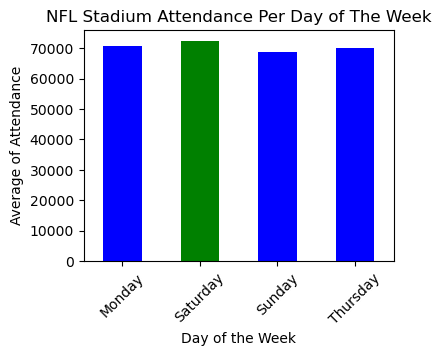

In [37]:
# plot avg arrests per game day of the week
# https://stackoverflow.com/questions/40313727/bar-graph-from-dataframe-groupby
my_colors = list(islice(cycle(['b', 'g', 'b', 'b']), None, len(combined_df.groupby('day_of_week')['weekly_attendance'].mean())))
day_of_week_df.groupby('day_of_week')['weekly_attendance'].mean().plot(kind='bar', title='NFL Stadium Attendance Per Day of The Week', 
                                                          ylabel='Average of Attendance',xlabel='Day of the Week', color = my_colors, figsize=(4, 3), rot = 45)

Text(0, 0.5, '# of Attendees')

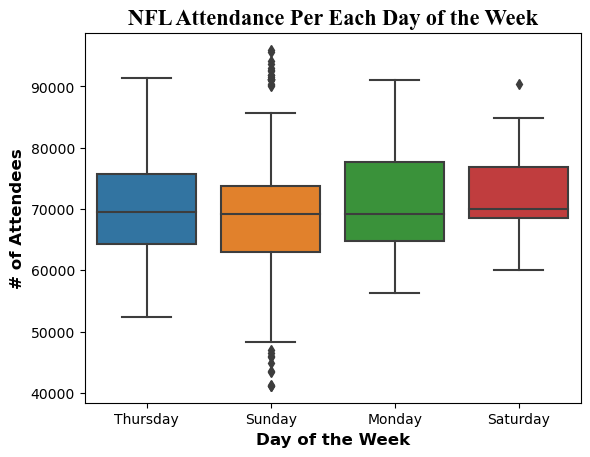

In [38]:
# plot box plot of NFL Attendance Per Each Day of the Week
dow_att_box_plot = sns.boxplot(data=day_of_week_df, x="day_of_week", y ="weekly_attendance")
dow_att_box_plot.set_title("NFL Attendance Per Each Day of the Week", fontname="Times New Roman", size = 16,fontweight="bold")
dow_att_box_plot.set_xlabel("Day of the Week", size = 12, fontweight="bold")
dow_att_box_plot.set_ylabel("# of Attendees", size = 12, fontweight="bold")

Text(0, 0.5, '# of Attendees')

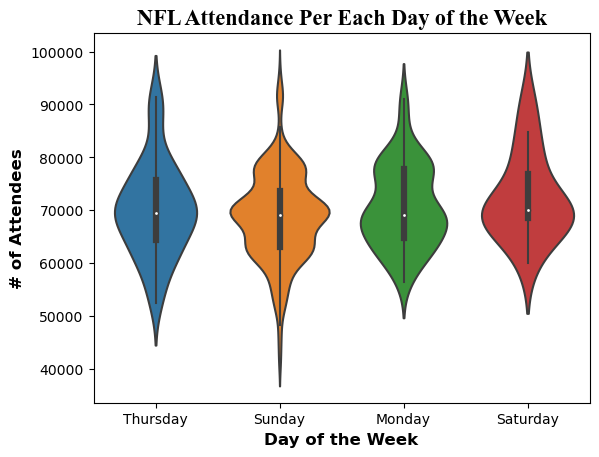

In [39]:
# plot violin plot of NFL Attendance Per Each Day of the Week
dow_att_box_plot = sns.violinplot(data=day_of_week_df, x="day_of_week", y ="weekly_attendance", figsize = (8,2))
dow_att_box_plot.set_title("NFL Attendance Per Each Day of the Week", fontname="Times New Roman", size = 16,fontweight="bold")
dow_att_box_plot.set_xlabel("Day of the Week", size = 12, fontweight="bold")
dow_att_box_plot.set_ylabel("# of Attendees", size = 12, fontweight="bold")

In [40]:
# create subset of Thur games and weekly attendance
thurs_att = day_of_week_df.loc[day_of_week_df.day_of_week == "Thursday", "weekly_attendance"]
print(thurs_att.mean())
print(thurs_att.var())

70178.5
79056249.69298245


In [41]:
# create subset of Sun games and weekly attendance
sun_att = day_of_week_df.loc[day_of_week_df.day_of_week == "Sunday", "weekly_attendance"]
print(sun_att.mean())
print(sun_att.var())

68754.16121212121
70062148.21062951


In [42]:
# create subset of Mon games and weekly attendance
mon_att = day_of_week_df.loc[day_of_week_df.day_of_week == "Monday", "weekly_attendance"]
print(mon_att.mean())
print(mon_att.var())

70713.50746268657
60652457.04161013


In [43]:
# create subset of Sat games and weekly attendance
sat_att = day_of_week_df.loc[day_of_week_df.day_of_week == "Saturday", "weekly_attendance"]
print(sat_att.mean())
print(sat_att.var())

72345.28571428571
65983055.14285715


In [44]:
# ANOVA test for day of the week and attendance
stats.f_oneway(thurs_att, sun_att, sat_att, mon_att)

F_onewayResult(statistic=2.303681008817106, pvalue=0.07549212630404502)

In [45]:
#t-test for Sun and Sat
stats.ttest_ind(sun_att, sat_att, equal_var=False)

TtestResult(statistic=-1.6394583094302606, pvalue=0.12424848056501245, df=13.472639769606227)

In [46]:
# t-test for Sun and Thurs
stats.ttest_ind(sun_att, thurs_att, equal_var=False)

TtestResult(statistic=-1.1836808689360754, pvalue=0.2408965488295688, df=64.30674281020254)

In [47]:
# t-test for Sun and Mon
# There is a significant difference between Sunday and Monday game attendance
stats.ttest_ind(sun_att, mon_att, equal_var=False)

TtestResult(statistic=-1.969033735797458, pvalue=0.05245981282696772, df=78.90832934754886)

In [48]:
# t-test for Mon and Sat
stats.ttest_ind(mon_att, sat_att, equal_var=False)

TtestResult(statistic=-0.688426040243472, pvalue=0.4998006763724756, df=18.34026076548382)

In [49]:
# t-test for Mon and Thurs
stats.ttest_ind(mon_att, thurs_att, equal_var=False)

TtestResult(statistic=0.35523001703159574, pvalue=0.7230718942183841, df=114.30966223715984)

In [50]:
# What time of day games has the most arrests? 
# Does stadium type have any relationship with arrests?

In [51]:
# hour and arrest correlation
combined_df.loc[:,["hour", "arrests"]].corr()

,hour,arrests
hour,1.000000,0.146985
arrests,0.146985,1.000000


0.5393408114466925*x+-1.2042907513490027


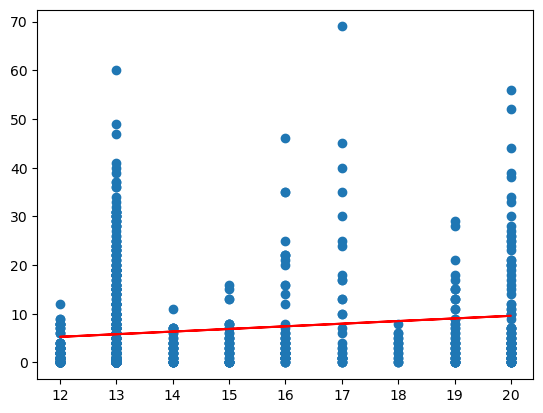

In [52]:
# plot to visualize any correlation
x = combined_df["hour"]
y = combined_df["arrests"]
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
print(f'{m}*x+{b}')

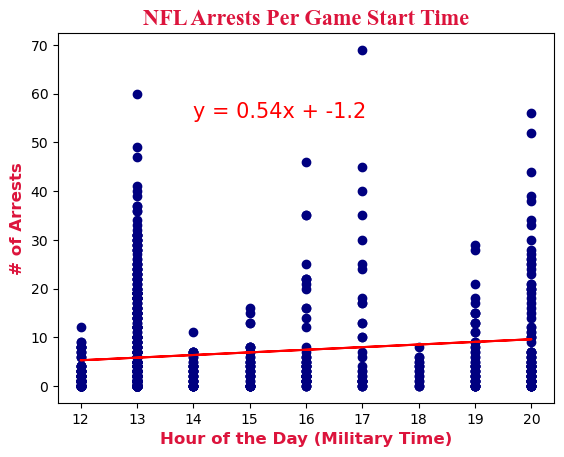

In [53]:
# visualize correlation with a scatter plot and plot the regression lin. 
# Get the regression formula
x_values = combined_df['hour']
y_values = combined_df['arrests']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "navy")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,55),fontsize=15,color="red")
plt.xlabel('Hour of the Day (Military Time)', size = 12,fontweight="bold", color = "crimson")
plt.ylabel('# of Arrests', size = 12,fontweight="bold", color = "crimson")
plt.title ("NFL Arrests Per Game Start Time", fontname="Times New Roman", size = 16,fontweight="bold", color = "crimson")
plt.show()

Text(0, 0.5, '# of Arrests')

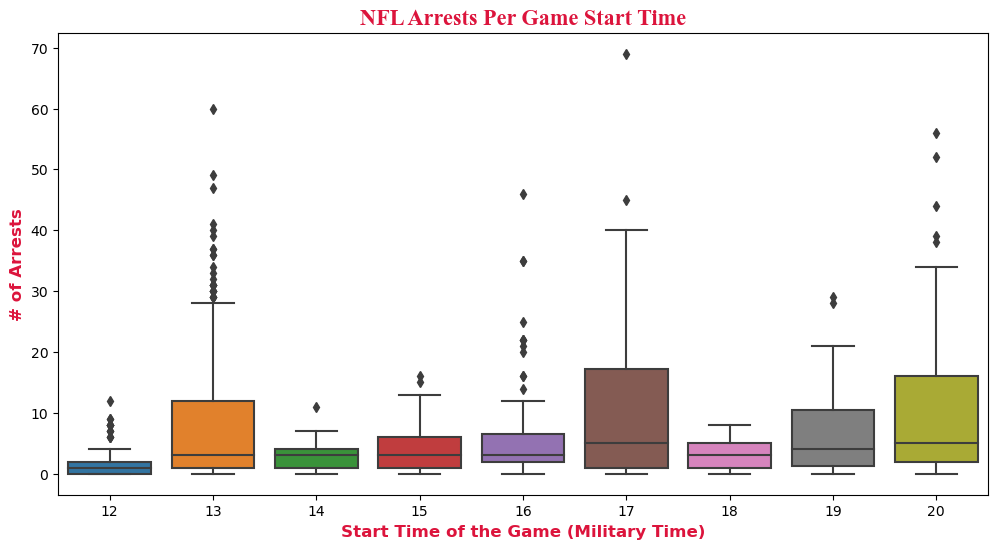

In [54]:
# Plot a box plot of NFL Arrests Per Game Start Time
plt.figure(figsize=(12, 6))
hour_arr_box_plot = sns.boxplot(data=combined_df, x="hour", y ="arrests")
hour_arr_box_plot.set_title("NFL Arrests Per Game Start Time", fontname="Times New Roman", size = 16,fontweight="bold", color = "crimson")
hour_arr_box_plot.set_xlabel("Start Time of the Game (Military Time)", size = 12, fontweight="bold", color = "crimson")
hour_arr_box_plot.set_ylabel("# of Arrests", size = 12, fontweight="bold", color = "crimson")


In [55]:
# total games for each hour of the day
combined_df.hour.value_counts()

hour
13    482
12    144
20     97
16     59
19     50
14     43
15     41
17     32
18     17
Name: count, dtype: int64

In [56]:
# avg arrests at games for each hour of the day
combined_df.groupby(by ='hour')['arrests'].mean()

hour
12     1.715278
13     7.406639
14     2.930233
15     4.268293
16     7.322034
17    12.500000
18     3.176471
19     6.720000
20    10.226804
Name: arrests, dtype: float64

In [57]:
# what day of the week has the highest avg of arrests at a game
day_arr = day_of_week_df.groupby('day_of_week').arrests.mean()
max_bar = max(day_arr.index)
max_bar

'Thursday'

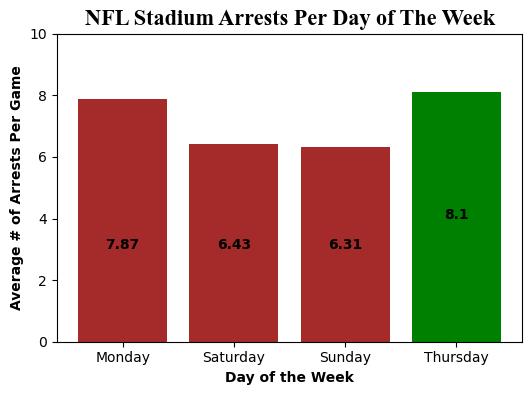

In [58]:
# plot bar graph of NFL Stadium Arrests Per Day of the Week
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i], 2), ha = 'center', fontweight="bold")

x = day_arr.index
y = day_arr.values


plt.figure(figsize=(6,4))
color = ['brown', 'brown', 'brown', 'green']
plt.bar(x, y, color = color)
plt.ylim(0, 10)
addlabels(x, y)
plt.title('NFL Stadium Arrests Per Day of The Week', fontname="Times New Roman", size = 16,fontweight="bold")
plt.xlabel('Day of the Week', size = 10,fontweight="bold")
plt.ylabel('Average # of Arrests Per Game', size = 10,fontweight="bold")
plt.show()

In [79]:
# store groupby into variable
day_att = day_of_week_df.groupby('day_of_week').weekly_attendance.mean()


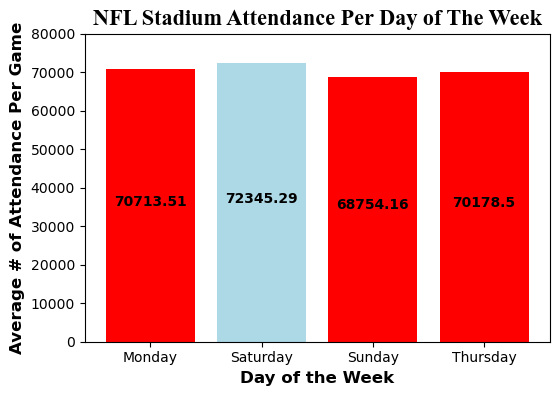

In [60]:
# create bar graph of NFL Stadium Attendance Per Day of the week
x = day_att.index
y = day_att.values


color = ['red', 'lightblue', 'red' ,'red']
plt.figure(figsize=(6,4))
plt.bar(x, y, color = color)
addlabels(x, y)
plt.title('NFL Stadium Attendance Per Day of The Week', fontname="Times New Roman", size = 16,fontweight="bold")
plt.xlabel('Day of the Week', size = 12,fontweight="bold")
plt.ylabel('Average # of Attendance Per Game', size = 12,fontweight="bold")
plt.ylim(0,80000)
plt.show()

In [61]:
# store groupby in variable for plot later
hour_arr = combined_df.groupby('hour').arrests.mean()

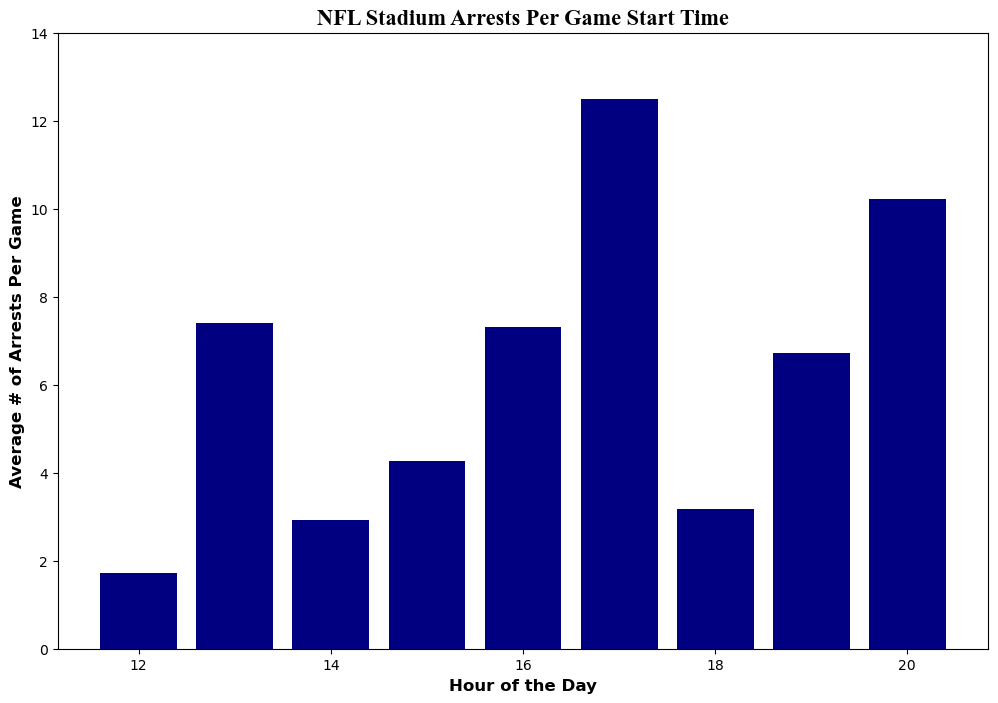

In [80]:
# plot bar graph of average arrests per game start time
x = hour_arr.index
y = hour_arr.values


plt.figure(figsize=(12,8))
plt.bar(x, y, color = "navy")
# addlabels(x, y)
plt.title('NFL Stadium Arrests Per Game Start Time', fontname="Times New Roman", size = 16,fontweight="bold")
plt.xlabel('Hour of the Day', size = 12,fontweight="bold")
plt.ylabel('Average # of Arrests Per Game', size = 12,fontweight="bold")
plt.ylim(0,14)
plt.show()

In [81]:
# create column "type of stadium and enter teams with domed stadium in our dataset and 'not domed' for everybody else" 
combined_df["type_of_stadium"] = np.where(combined_df['home_team'] == "Arizona Cardinals", 'domed', 'not domed')
combined_df["type_of_stadium"] = np.where(combined_df['home_team'] == "Dallas Cowboys", 'domed', combined_df["type_of_stadium"])
combined_df["type_of_stadium"] = np.where(combined_df['home_team'] == "Houston Texans", 'domed', combined_df["type_of_stadium"])
combined_df["type_of_stadium"] = np.where(combined_df['home_team'] == "Indianapolis Colts", 'domed', combined_df["type_of_stadium"])
combined_df["type_of_stadium"] = np.where(combined_df['home_team'] == "New Orleans Saints", 'domed', combined_df["type_of_stadium"])
combined_df.groupby('type_of_stadium').home_team.nunique()



type_of_stadium
domed         4
not domed    21
Name: home_team, dtype: int64

In [64]:
# avg # of arrests for each type of stadium
combined_df.groupby('type_of_stadium').arrests.mean()

type_of_stadium
domed        2.912500
not domed    7.286957
Name: arrests, dtype: float64

Text(0, 0.5, '# of Arrest Per Game')

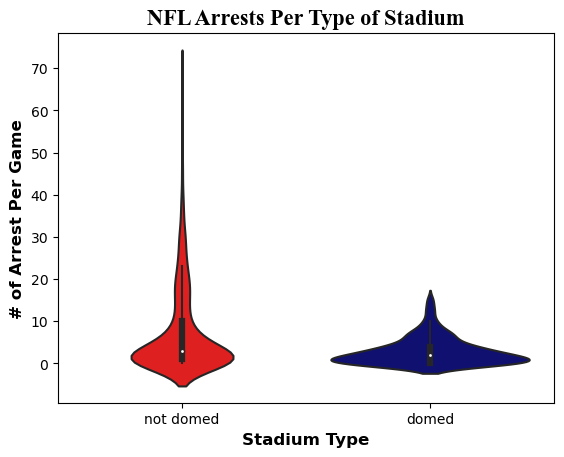

In [82]:
# create violin plot of NFL Arrests per type of stadium with presentation color design
my_pal = {"not domed": "red", "domed": "navy"}
stadium_violin_plot = sns.violinplot(data=combined_df, x="type_of_stadium", y ="arrests", palette=my_pal)

stadium_violin_plot.set_title("NFL Arrests Per Type of Stadium", fontname="Times New Roman", size = 16,fontweight="bold")
stadium_violin_plot.set_xlabel("Stadium Type", size = 12, fontweight="bold")
stadium_violin_plot.set_ylabel("# of Arrest Per Game", size = 12, fontweight="bold")

Text(0, 0.5, 'Average # of Arrest Per Game')

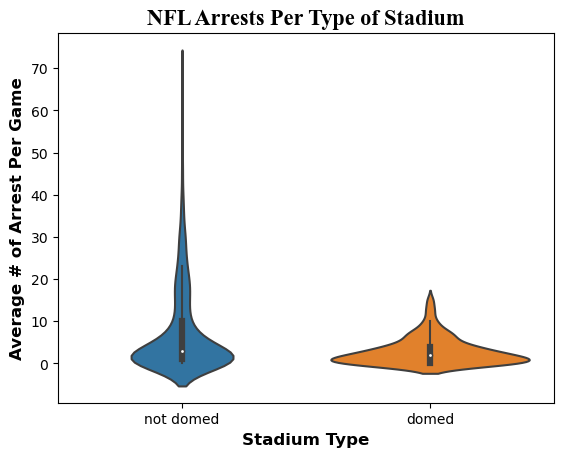

In [66]:
# create violin plot of NFL Arrests per type of stadium with presentation color design
stadium_violin_plot = sns.violinplot(data=combined_df, x="type_of_stadium", y ="arrests")
stadium_violin_plot.set_title("NFL Arrests Per Type of Stadium", fontname="Times New Roman", size = 16,fontweight="bold")
stadium_violin_plot.set_xlabel("Stadium Type", size = 12, fontweight="bold")
stadium_violin_plot.set_ylabel("Average # of Arrest Per Game", size = 12, fontweight="bold")

In [83]:
# create subset of domed stadiums and their arrests
domed_arr = combined_df.loc[combined_df.type_of_stadium == "domed", "arrests"]
print(domed_arr.mean())
print(domed_arr.var())

2.9125
10.44512578616351


In [84]:
# create subset of not domed stadiums and their arrests
notdomed_arr = combined_df.loc[combined_df.type_of_stadium == "not domed", "arrests"]
print(notdomed_arr.mean())
print(notdomed_arr.var())

7.28695652173913
103.33173264114231


In [85]:
# t-test between domed and not domed 
stats.ttest_ind(domed_arr, notdomed_arr, equal_var=False)

TtestResult(statistic=-9.940805850423384, pvalue=5.04482343911883e-22, df=792.8219330088324)

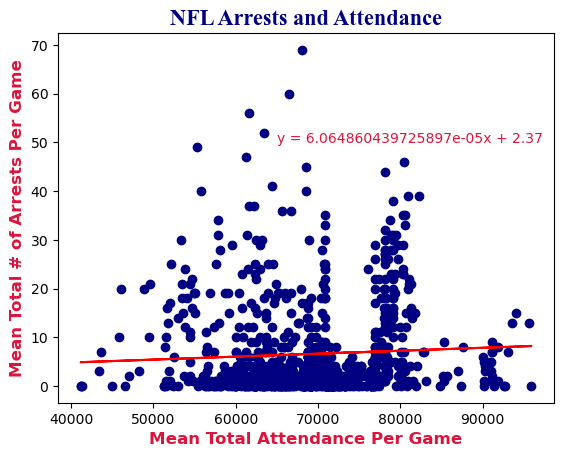

In [86]:
# create scatter plot of weekly attendance and Mean total attendance per game with regression line and formula
x_values = combined_df['weekly_attendance']
y_values = combined_df['arrests']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "navy")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65000,50),fontsize=10,color="crimson")
plt.xlabel('Mean Total Attendance Per Game', size = 12,fontweight="bold", color = "crimson")
plt.ylabel('Mean Total # of Arrests Per Game', size = 12,fontweight="bold", color = "crimson")
plt.title ("NFL Arrests and Attendance", fontname="Times New Roman", size = 16,fontweight="bold", color = "navy")
plt.show()

In [71]:
# correlation of weekly attendance and arrests
combined_df.loc[:,["weekly_attendance", "arrests"]].corr()

,weekly_attendance,arrests
weekly_attendance,1.000000,0.053433
arrests,0.053433,1.000000


In [72]:
combined_df.head()

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,away_score,yds_win,turnovers_win,yds_loss,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested,type_of_stadium
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,34,399,0,477,1,70555.0,Thursday,7:30:00 PM,NaN,8.0,n,2011-09-08 19:30:00,19,8,Home,0.011339,not domed
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,7,385,0,312,7,71434.0,Sunday,1:05:00 PM,NaN,1.0,y,2011-09-11 13:05:00,13,28,Home,0.001400,not domed
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,7,384,3,236,2,71444.0,Sunday,12:00:00 PM,NaN,2.0,y,2011-09-11 12:00:00,12,27,Home,0.002799,domed
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,14,323,1,292,1,61619.0,Sunday,1:00:00 PM,NaN,4.0,y,2011-09-11 13:00:00,13,2,Home,0.006492,not domed
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,12,377,1,386,3,62115.0,Sunday,12:00:00 PM,NaN,1.0,n,2011-09-11 12:00:00,12,18,Home,0.001610,not domed


In [73]:
# view San Diego Chargers data (just learned they had the most arrests)
san_diego = combined_df.loc[combined_df["home_team"] == "San Diego Chargers"]
san_diego.head()

,year,week,home_team,away_team,winner,tie,day,date,time,home_score,away_score,yds_win,turnovers_win,yds_loss,turnovers_loss,weekly_attendance,day_of_week,gametime_local,OT_flag,arrests,division_game,DateTime,hour,score_gap,home_away_winner,%_arrested,type_of_stadium
8,2011,1,San Diego Chargers,Minnesota Vikings,San Diego Chargers,NaN,Sun,September 11,4:20PM,24,17,407,2,187,1,66716.0,Sunday,1:15:00 PM,NaN,15.0,n,2011-09-11 13:15:00,13,7,Home,0.022483,not domed
28,2011,3,San Diego Chargers,Kansas City Chiefs,San Diego Chargers,NaN,Sun,September 25,4:05PM,20,17,375,2,252,1,62236.0,Sunday,1:05:00 PM,NaN,37.0,y,2011-09-25 13:05:00,13,3,Home,0.059451,not domed
45,2011,4,San Diego Chargers,Miami Dolphins,San Diego Chargers,NaN,Sun,October 2,4:15PM,26,16,411,0,248,2,63002.0,Sunday,1:15:00 PM,NaN,29.0,n,2011-10-02 13:15:00,13,10,Home,0.046030,not domed
95,2011,9,San Diego Chargers,Green Bay Packers,Green Bay Packers,NaN,Sun,November 6,4:15PM,38,45,368,0,460,3,68908.0,Sunday,1:15:00 PM,NaN,30.0,n,2011-11-06 13:15:00,13,7,Away,0.043536,not domed
98,2011,10,San Diego Chargers,Oakland Raiders,Oakland Raiders,NaN,Thu,November 10,8:29PM,17,24,489,2,314,2,68109.0,Thursday,5:20:00 PM,NaN,69.0,y,2011-11-10 17:20:00,17,7,Away,0.101308,not domed


In [74]:
# groupby each team when they were home and the average # of arrests for each
combined_df.groupby("home_team").arrests.mean()

home_team
Arizona Cardinals        4.150000
Baltimore Ravens         1.483871
Carolina Panthers        1.375000
Chicago Bears            0.812500
Cincinnati Bengals       1.425000
Dallas Cowboys           4.225000
Denver Broncos           2.625000
Green Bay Packers        7.200000
Houston Texans           1.000000
Indianapolis Colts       2.275000
Jacksonville Jaguars     1.729730
Kansas City Chiefs       1.820513
Miami Dolphins           2.387097
New England Patriots     4.700000
New York Giants         22.475000
New York Jets           21.717949
Oakland Raiders         17.783784
Philadelphia Eagles      3.150000
Pittsburgh Steelers     16.750000
San Diego Chargers      24.575000
San Francisco 49ers     11.350000
Seattle Seahawks         0.800000
Tampa Bay Buccaneers     0.846154
Tennessee Titans         2.075000
Washington Redskins      2.675000
Name: arrests, dtype: float64

In [75]:
# score gap and arrests correlation
combined_df.loc[:,["score_gap", "arrests"]].corr()

,score_gap,arrests
score_gap,1.000000,-0.052864
arrests,-0.052864,1.000000


In [76]:
# What game day of the week has the most/least arrests per stadium
    # Thursay by average but Sunday may be "watered down" due to the percentage of games on Sundays 
    # After doing a t-test there is no significant difference between Thursday (highest avg) and Sunday (lowest avg)
# What game day of the week has the best attendance per stadium
    

In [87]:
# trying and failing to see total amount of wins at home and total number of wins away for each team (home field advantage insight)
# future work
total_home_wins = combined_df.groupby("home_team").home_away_winner.value_counts()
total_home_wins

home_team             home_away_winner
Arizona Cardinals     Home                30
                      Away                10
Baltimore Ravens      Home                22
                      Away                 9
Carolina Panthers     Home                25
                      Away                15
Chicago Bears         Home                17
                      Away                15
Cincinnati Bengals    Home                27
                      Away                13
Dallas Cowboys        Away                21
                      Home                19
Denver Broncos        Home                31
                      Away                 9
Green Bay Packers     Home                32
                      Away                 8
Houston Texans        Home                22
                      Away                18
Indianapolis Colts    Home                25
                      Away                15
Jacksonville Jaguars  Away                25
                